Our eyes can only see colors in the visible spectrum as combinations of red, green and blue(RGB). Air and space-borne sensors can collect wavelengths of energy outside the visible spectrum. To view this data, we can images representing different wavelenths in and out of the RGB channels to make color images.

In [2]:
#importing the necessary dependency
from osgeo import gdal_array


In [3]:
#name of the source image
src = 'FalseColor.tif'

#loading the source image into an array
arr = gdal_array.LoadFile(src)


In [5]:
#swapping bands 1 and 2 for a natural color image using numpy's 'advanced slicing'
output = gdal_array.SaveArray(arr[[1,0,2],:],"swap.tif",format='GTiff',prototype = src)

#Deferencing the output to avoid corrupted file on some platforms
output = None

**Creating Histograms**


In [8]:
import turtle as t

In [ ]:
def draw_histogram(hist, scale=True):
    t.color("black")
    axes = ((-355, -200), (355, -200), (-355, -200), (-355, 250))
    t.up()
    for p in axes:
        t.goto(p)
        t.down()
        t.up()

In [ ]:
t.goto(0, -250)
t.write("VALUE", font=("Arial, ", 12, "bold"))
t.up()
t.goto(-400, 280)
t.write("FREQUENCY", font=("Arial, ", 12, "bold"))
x = -355
y = -200
t.up()

In [ ]:
for i in range(1, 11):
    x = x+65
    t.goto(x, y)
    t.down()
    t.goto(x, y-10)
    t.up()
    t.goto(x, y-25)
    t.write("{}".format((i*25)), align="center")

In [15]:
im = "swap.tif"
arr = gdal_array.LoadFile(im)

In [16]:
def histogram(a, bins=list(range(0, 256))): 
    fa = a.flat 
    n = gdal_array.numpy.searchsorted(gdal_array.numpy.sort(fa), bins) 
    n = gdal_array.numpy.concatenate([n, [len(fa)]]) 
    hist = n[1:]-n[:-1] 
    return hist

In [17]:
import seaborn as sns


In [18]:
histograms = []
for b in arr:
    histograms.append(histogram(b))
    
    

ValueError: The 'color' keyword argument must have one color per dataset, but 256 datasets and 1 colors were provided

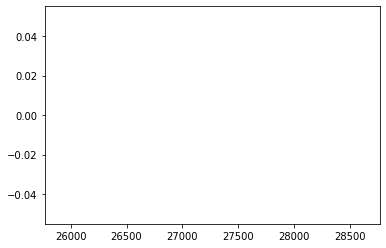

In [20]:
sns.distplot(histograms)